<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=600 height=500/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Линейные алгоритмы</b></h3>


В этой домашке вы напишите свой класс логистической регрессии для бинарной классификации, а также логистическую регрессию с регуляризацией.

In [1]:
import numpy as np
import pandas as pd
import scipy.linalg as sla
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [2]:
np.random.seed(42)

# Градиентный спуск: повторение

Рассмотрим функцию от двух переменных
$f(x, y) = \sin^2 x + \sin^2 y$  

In [3]:
def f(x):
    """
    :param x: np.array(np.float) вектор длины 2
    :return: np.float
    """
    return np.sum(np.sin(x)**2)

In [38]:
a = [5, 6, 1, 3, 4, 7, 2]

i = 1
c = 0

for _ in range(100):
    j = a[i - 1]
    a[i - 1] = i
    i = j
    c += i
    print(a)
c

[1, 6, 1, 3, 4, 7, 2]
[1, 6, 1, 3, 5, 7, 2]
[1, 6, 1, 4, 5, 7, 2]
[1, 6, 3, 4, 5, 7, 2]
[1, 6, 3, 4, 5, 7, 2]
[1, 6, 3, 4, 5, 7, 2]
[1, 6, 3, 4, 5, 7, 2]
[1, 6, 3, 4, 5, 7, 2]
[1, 6, 3, 4, 5, 7, 2]
[1, 6, 3, 4, 5, 7, 2]
[1, 6, 3, 4, 5, 7, 2]
[1, 6, 3, 4, 5, 7, 2]
[1, 6, 3, 4, 5, 7, 2]
[1, 6, 3, 4, 5, 7, 2]
[1, 6, 3, 4, 5, 7, 2]
[1, 6, 3, 4, 5, 7, 2]
[1, 6, 3, 4, 5, 7, 2]
[1, 6, 3, 4, 5, 7, 2]
[1, 6, 3, 4, 5, 7, 2]
[1, 6, 3, 4, 5, 7, 2]
[1, 6, 3, 4, 5, 7, 2]
[1, 6, 3, 4, 5, 7, 2]
[1, 6, 3, 4, 5, 7, 2]
[1, 6, 3, 4, 5, 7, 2]
[1, 6, 3, 4, 5, 7, 2]
[1, 6, 3, 4, 5, 7, 2]
[1, 6, 3, 4, 5, 7, 2]
[1, 6, 3, 4, 5, 7, 2]
[1, 6, 3, 4, 5, 7, 2]
[1, 6, 3, 4, 5, 7, 2]
[1, 6, 3, 4, 5, 7, 2]
[1, 6, 3, 4, 5, 7, 2]
[1, 6, 3, 4, 5, 7, 2]
[1, 6, 3, 4, 5, 7, 2]
[1, 6, 3, 4, 5, 7, 2]
[1, 6, 3, 4, 5, 7, 2]
[1, 6, 3, 4, 5, 7, 2]
[1, 6, 3, 4, 5, 7, 2]
[1, 6, 3, 4, 5, 7, 2]
[1, 6, 3, 4, 5, 7, 2]
[1, 6, 3, 4, 5, 7, 2]
[1, 6, 3, 4, 5, 7, 2]
[1, 6, 3, 4, 5, 7, 2]
[1, 6, 3, 4, 5, 7, 2]
[1, 6, 3, 4, 5, 7, 2]
[1, 6, 3, 

109

Обратите внимание, что $x$ - numpy-array вектор длины 2.

***Reminder:***  
Что мы хотим? Мы хотим найти минимум этой функции (в машинному обучении мы обычно хотим найти минимум **функции потерь**, например, MSE), а точнее найти $x_1$ и $x_2$ такие, что при них значение $f(x_1,x_2)$ минимально, то есть *точку экстремума*.  
  
Как мы будем искать эту точку? Используем методы оптимизации (в нашем случае - *минимизации*). Одним из таких методов и является **градиентный спуск**.

## Задание 1
Реализуйте функцию, которая будет осуществлять градиентный спуск для функции $f$:

*Примечание:* Вам нужно посчитать частные производные именно **аналитически** и **переписать их в код**, а не считать производные численно (через отношение приращения функции к приращению аргумента) -- в этих двух случаях могут различаться ответы, поэтому будьте внимательны.

In [4]:
#Сначала реализуем функцию, вычисляющую градиент

def grad_f(x): 
    """
    Градиент функциии f, определенной выше.
    :param x: np.array[2]: float вектор длины 2
    :return: np.array[2]: float вектор длины 2
    """
    return 2 * np.sin(x) * np.cos(x)

In [5]:
# Проверим, что градиент принимает вектор из двух чисел и выдает на этой точке верное значение
assert np.allclose(grad_f(np.array([1, 2])), 
                   np.array([0.90929743, -0.7568025])), "Что-то не так!" 

In [6]:
def grad_descent_2d(f, grad_f, lr, num_iter=100, x0=None):
    """
    функция, которая реализует градиентный спуск в минимум для функции f от двух переменных. 
        :param f: скалярная функция двух переменных
        :param grad_f: функция, возвращающая градиент функции f (устроена как реализованная вами выше grad_f)
        :param lr: learning rate алгоритма
        :param num_iter: количество итераций градиентного спуска
        :return: np.array[num_iter, 2] пар вида (x, f(x))
    """
    if x0 is None:
        x0 = np.random.random(2)

    # Будем сохранять значения аргументов и значений функции
    # в процессе град. Спуска в переменную history
    history = []

    # итерация цикла -- шаг градиентнго спуска
    curr_x = x0.copy()
    for iter_num in range(num_iter):
        entry = np.hstack((curr_x, f(curr_x)))
        history.append(entry)
    
        curr_x -= lr * grad_f(curr_x)#  YOUR CODE. Не забудьте про lr!

    return np.vstack(history)

### Тестируем написанную функцию

In [7]:
steps = grad_descent_2d(f, grad_f, lr=0.1, num_iter=20)

Визуализируем точки градиентного спуска на 3D-графике нашей функции. Звездочками будут обозначены точки (тройки $x_1, x_2, f(x_1, x_2)$), по которым Ваш алгоритм градиентного спуска двигался к минимуму.

(Для того, чтобы написовать этот график, мы и сохраняли значения $cur\_x_1, cur\_x_2, f(cur\_x_1, cur\_x_2)$ в `steps` в процессе спуска)

Если у Вас правильно написана функция `grad_descent_2d`, то звездочки на картинке должны сходиться к одной из точку минимума функции. Вы можете менять начальные приближения алгоритма, значения `lr` и `num_iter` и получать разные результаты.

In [8]:
steps

array([[3.74540119e-01, 9.50714306e-01, 7.96162814e-01],
       [3.06443570e-01, 8.56130580e-01, 6.61501405e-01],
       [2.48920419e-01, 7.57129527e-01, 5.32438585e-01],
       [2.01167461e-01, 6.57289308e-01, 4.13213611e-01],
       [1.62010673e-01, 5.60553766e-01, 3.08675973e-01],
       [1.30172552e-01, 4.70495524e-01, 2.22355696e-01],
       [1.04431147e-01, 3.89681303e-01, 1.55185446e-01],
       [8.36964420e-02, 3.19398688e-01, 1.05582063e-01],
       [6.70352177e-02, 2.59775649e-01, 7.04659717e-02],
       [5.36683031e-02, 2.10126580e-01, 4.63846811e-02],
       [4.29552413e-02, 1.69327420e-01, 3.02428152e-02],
       [3.43747570e-02, 1.36105556e-01, 1.95917748e-02],
       [2.75052200e-02, 1.09219378e-01, 1.26378615e-02],
       [2.20069501e-02, 8.75488032e-02, 8.12945761e-03],
       [1.76069810e-02, 7.01283780e-02, 5.21990623e-03],
       [1.40863125e-02, 5.61486426e-02, 3.34776943e-03],
       [1.12694227e-02, 4.49425016e-02, 2.14546343e-03],
       [9.01572898e-03, 3.59660

C:\Users\Alexey\AppData\Local\Temp\ipykernel_26552\2833961806.py:13: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


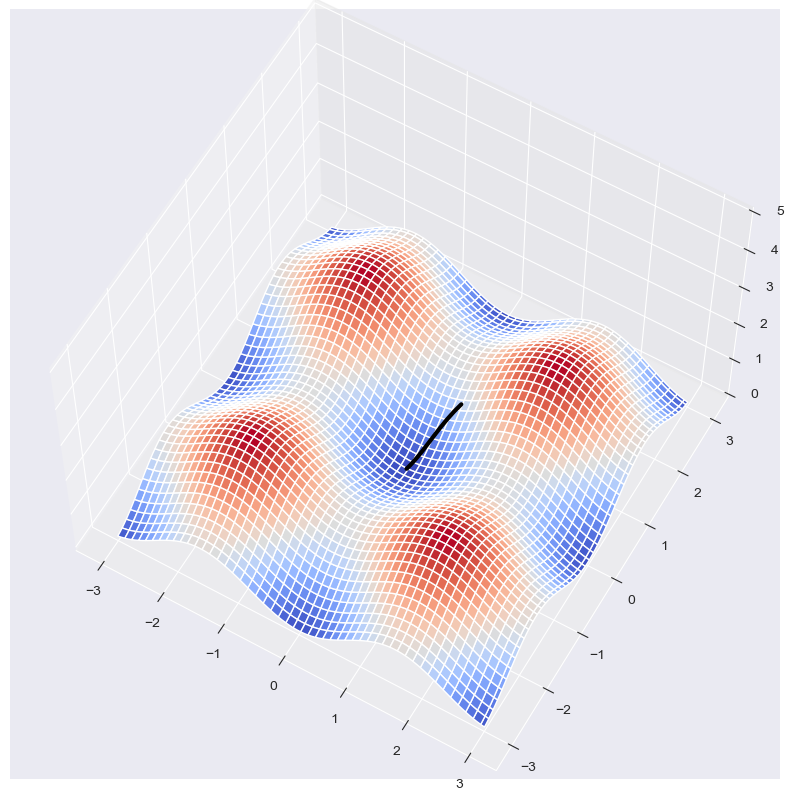

In [9]:
# %matplotlib osx

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

path = []

X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection='3d')

zs = np.array([f(np.array([x,y]))
              for x, y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)


ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, zorder=2)

ax.plot(xs=steps[:, 0], ys=steps[:, 1], zs=steps[:, 2],
        marker='*', markersize=0.5, zorder=3,
        markerfacecolor='y', lw=3, c='black')

ax.set_zlim(0, 5)
ax.view_init(elev=60)
plt.show()

Посмотрим на график значений функции от шага

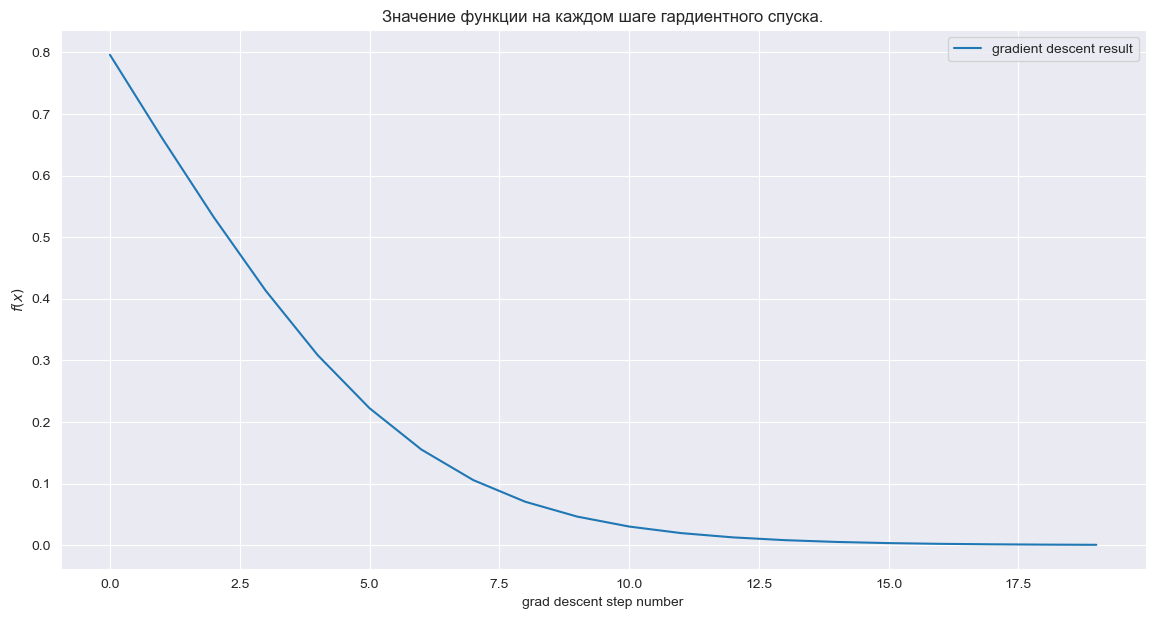

In [10]:
plt.figure(figsize=(14,7))
plt.xlabel('grad descent step number')
plt.ylabel('$f(x)$')
plt.title('Значение функции на каждом шаге гардиентного спуска.')

f_values = list(map(lambda x: x[2], steps))
plt.plot(f_values, label='gradient descent result')
plt.legend()

Когда вы используете градиентный спуск всегда нужно проверять, сошелся ли он. К сожалению для большинства моделей не получится построить 3D график, поэтому обязательно нужно смотреть на то, как менялся лосс на каждом шаге градиентного спуска.

# Генератор батчей

Обычно генерация батчей отличается от той, которую мы использовали в семинаре. Мы выбирали *batch_size* случайных строчек на каждом шаге, но у такого подхода есть минусы. Основной заключается в том, что некоторые строчки из обучающего датасета могут попадаться значительно реже, чем другие. 

Чтобы это исправить обучение делят на эпохи. Мы хотим, чтобы в течение одной эпохи модель обучилась на каждом примере один раз. Для этого нужно перемешать строчки в датасете и каждый раз брать очередные *batch_size* строчек. 

Может так получится, что размер датасета не делится на *batch_size*, тогда последний батч будет состоять из нескольких последних строк и его размер будет меньше, чем *batch_size*. Такой батч иногда выкидывают и просто не используют. Именно так вам нужно поступить в этом задании.

## Задание 2

Напишите генератор батчей, который будет принимать на вход признаки, ответы и размер батча. Генератор должен возвращать tuple из ($X_{batch}$, $y_{batch}$). Если размер датасета не делится на batch_size, то **последний маленький батч возвращать не нужно**. 

Подробнее про Python генераторы можно прочитать здесь:

[Документация](https://wiki.python.org/moin/Generators)

[Описание на русском](https://pythoner.name/list-generator)

Чтобы не перемешивать сам датасет воспользуйтесь np.random.permutation(len(X))


In [121]:
def generate_batches(X, y, batch_size):
    """
    param X: np.array[n_objects, n_features] --- матрица объекты-признаки
    param y: np.array[n_objects] --- вектор целевых переменных
    """
    assert len(X) == len(y)
    np.random.seed(42)
    X = np.array(X)
    y = np.array(y)
    perm = np.random.permutation(len(X))

    for batch_start in range(len(X) // batch_size):
        i = batch_start * batch_size
        indeces = perm[i : i + batch_size]
        batch_X = X[indeces].copy()
        batch_y = y[indeces].copy()
        yield (batch_X, batch_y)

### Тестируем написанную функцию

Проверим, что наш генератор батчей перемешивает датасет и каждый элемент встречается один раз:

In [128]:
X_fake = np.arange(100)[:, np.newaxis]
y_fake = np.arange(100) + 1000

X_reconstructed, y_reconstructed = [], []
for X_batch, y_batch in generate_batches(X_fake, y_fake, 10):
    X_reconstructed.append(X_batch)
    y_reconstructed.append(y_batch)

X_reconstructed = np.concatenate(X_reconstructed)
y_reconstructed = np.concatenate(y_reconstructed)

# print(X_fake.shape, X_reconstructed.shape)

assert (X_fake != X_reconstructed).all(), "Что-то не так!"
assert (y_fake != y_reconstructed).all(), "Что-то не так!"

# print(np.sort(X_reconstructed, axis=0), X_fake)
assert (np.sort(X_reconstructed, axis=0) == X_fake).all(), "Что-то не так!"

Попробуем теперь *batch_size* не делящий размер датасета.

In [129]:
X_fake = np.arange(100)[:, np.newaxis]
y_fake = np.arange(100) + 1000

num_batches = 0
for X_batch, y_batch in generate_batches(X_fake, y_fake, 7):
    num_batches += 1

assert num_batches == len(X_fake) // 7, "Что-то не так!"

# Обычная логистическая регрессия 
В этом пункте вы напишете класс логистической регрессии. Пока мы не будем добавлять в функцию потерь регуляризационные слагаемые. 

Вам необходимо будет воспользоваться оптимизацией с помощью SGD, используя генератор батчей, который вы написали выше.

## Задание 3
Реализуйте методы ``fit`` и ``get_grad`` класса ``MyLogisticRegression``. 


Напоминаем формулы:

$$Loss(y, p) = -\sum_{i=1}^{l} (y_i \log (p_i) + (1 - y_i) \log (1 - p_i))$$


$$ \frac{\partial L}{\partial w} = X^T (p - y)$$


In [130]:
def logit(x, w):
    return np.dot(x, w)

def sigmoid(h):
    return 1. / (1 + np.exp(-h))

In [131]:
class MyLogisticRegression(object):
    def __init__(self):
        self.w = None
    
    def fit(self, X, y, epochs=10, lr=0.1, batch_size=100):
        n, k = X.shape        
        if self.w is None:
            np.random.seed(42)
            # Вектор столбец в качестве весов
            self.w = np.random.randn(k + 1)

        X_train = np.concatenate((np.ones((n, 1)), X), axis=1)
        
        losses = []

        # Положите в лист losses лосс на каждом батче. Не нужно усреднять лосс по эпохе.

        for i in range(epochs):
            for X_batch, y_batch in generate_batches(X_train, y, batch_size):
                #В X_train уже добавлен вектор 1

                predictions = self._predict_proba_internal(X_batch) #YOUR CODE: предскажите вероятности на X_batch
                loss = self.__loss(y_batch, predictions) #YOUR CODE: вычислите loss на текущем батче

                assert (np.array(loss).shape == tuple()), "Лосс должен быть скаляром!" 

                losses.append(loss)

                self.w -= lr * self.get_grad(X_batch, y_batch, predictions)
                #YOUR CODE: обновите self.w по формуле градиентного спуска. Используйте функцию self.get_grad для вычисления градиента. Не забудьте про learning rate!

        return losses
    
    def get_grad(self, X_batch, y_batch, predictions):
        """
        param X_batch: np.array[batch_size, n_features + 1] --- матрица объекты-признаки
        param y_batch: np.array[batch_size] --- батч целевых переменных
        param predictions: np.array[batch_size] --- батч вероятностей классов

        Принимает на вход X_batch с уже добавленной колонкой единиц. 
        Выдаёт градиент функции потерь в логистической регрессии
        как сумму градиентов функции потерь на всех объектах батча
        ВНИМАНИЕ! Нулевая координата вектора весов -- это BIAS, а не вес признака. 
        Также не нужно ДЕЛИТЬ ГРАДИЕНТ НА РАЗМЕР БАТЧА:
        нас интересует не среднее, а сумма. 
        В качестве оператора умножения матриц можно использовать @ 

        Выход -- вектор-столбец градиентов для каждого веса (np.array[n_features + 1])
        """

        #компонент градиента из логрегрессии 
        #следите за размерностями
        
        grad_basic = np.dot(X_batch.T, (predictions - y_batch))
        assert grad_basic.shape == (X_batch.shape[1],) , "Градиенты должны быть столбцом из k_features + 1 элементов"

        return grad_basic
        
    def predict_proba(self, X):
        n, k = X.shape
        X_ = np.concatenate((np.ones((n, 1)), X), axis=1)
        return sigmoid(logit(X_, self.w))

    def _predict_proba_internal(self, X): 
        """
        Возможно, вы захотите использовать эту функцию вместо predict_proba, поскольку
        predict_proba конкатенирует вход с вектором из единиц, что не всегда удобно
        для внутренней логики вашей программы
        """
        return sigmoid(logit(X, self.w))

    def predict(self, X, threshold=0.5):
        return self.predict_proba(X) >= threshold
    
    def get_weights(self):
        return self.w.copy() 
        # copy тут используется неспроста. Если copy не использовать, то get_weights()
        # выдаст ссылку на объект, а, значит, модифицируя результат применения функции
        # get_weights(), вы модифицируете и веса self.w. Если вы хотите модифицировать веса, 
        # (например, в fit), используйте self.w
      
    def __loss(self, y, p):  
        p = np.clip(p, 1e-10, 1 - 1e-10)
        return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))

### Тестируем написанную функцию


In [132]:
m = MyLogisticRegression()
X = np.array([[1, 3, 4], [1, -5, 6], [-3, 5, 3]])
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
y = np.array([1, 0, 1])
preds = np.array([.55, .22, .85])
grads = m.get_grad(X, y, preds) 
assert np.allclose(grads, np.array([-0.38,  0.22, -3.2 , -0.93])), "Что-то не так!"

In [133]:
np.random.seed(42)
m = MyLogisticRegression()
X = np.random.rand(100,3)
y = np.random.randint(0, 1, size=(100,))
preds = np.random.rand(100)
grads = m.get_grad(X, y, preds) 
assert np.allclose(grads, np.array([23.8698149, 25.27049356, 24.4139452])), "Что-то не так!"

# Логистическая регрессия с $l_1$ и $l_2$ регуляризацией (elastic net).

Ваша задача -- написать класс логистической регрессии с обеими регуляризациями и оптимизацией с помощью SGD, используя генератор батчей, который вы написали выше.

Обратите внимание, что реализация ElasticNet отличается от реализации LogisticRegression только функцией потерь для оптимизации. Поэтому единственная функция, которая будет отличаться у двух методов, это ``self.get_grad()``. 

Поэтому в данном случае естественно применить паттерн *наследования*. Весь синтаксис наследования мы прописали за вас. Единственное, что вам осталось сделать, это переопределить метод ``get_grad()`` в отнаследованном классе.

## Задание 4
Реализуйте метод ``get_grad()`` класса ``MyElasticLogisticRegression`` 

Формулы:

$$L_1 (w) = \alpha \sum_{j=1}^{n}|w_j| $$

$$L_2 (w) = \beta\sum_{j=1}^{n}w_j^2$$

$$\frac{\partial L_1}{\partial w_1} = \alpha \cdot \mathrm{sign}(w_1)$$

$$ \frac{\partial L_2}{\partial w_1} = 2\beta w_1$$


In [136]:
class MyElasticLogisticRegression(MyLogisticRegression):
    def __init__(self, l1_coef, l2_coef):
        self.l1_coef = l1_coef
        self.l2_coef = l2_coef
        self.w = None
    
    def get_grad(self, X_batch, y_batch, predictions):
        """
        Принимает на вход X_batch с уже добавленной колонкой единиц. 
        Выдаёт градиент функции потерь в логистической регрессии с регуляризаторами
        как сумму градиентов функции потерь на всех объектах батча + регуляризационное слагаемое
        ВНИМАНИЕ! Нулевая координата вектора весов -- это BIAS, а не вес признака. 
        Bias в регуляризационные слагаемые не входит. Также не нужно ДЕЛИТЬ ГРАДИЕНТ НА РАЗМЕР БАТЧА:
        нас интересует не среднее, а сумма. 
  
        Выход -- вектор-столбец градиентов для каждого веса (np.array[n_features + 1])
        """

        grad_basic = super().get_grad(X_batch, y_batch, predictions) #YOUR CODE: компонент градиента из логрегрессии. Обнулять bias-компоненту этой составляющей градиента не нужно!

        grad_l1 = self.l1_coef * np.sign(self.w.copy()) #YOUR CODE: компонент градиента из l_1-регуляризации (не забудьте обнулить компоненту с bias)
        grad_l2 = 2 * self.l2_coef * self.w.copy() #YOUR CODE: компонент градиента из l_2-регуляризации (не забудьте обнулить компоненту с bias)
        grad_l1[0] = grad_l2[0] = 0
        #Обнулять bias-компоненту вектора весов не нужно!
        
        assert grad_l1[0] == grad_l2[0] == 0, "Bias в регуляризационные слагаемые не входит!"
        assert grad_basic.shape == grad_l1.shape == grad_l2.shape == (X_batch.shape[1],) , "Градиенты должны быть столбцом из k_features + 1 элементов"
        
        return grad_basic + grad_l1 + grad_l2

### Тестирование
Протестируем написанную функцию:


In [137]:
m = MyElasticLogisticRegression(.2,.2) 
X = np.array([[1, 3, 4], [1, -5, 6], [-3, 5, 3]])
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
y = np.array([1, 0, 1])
preds = np.array([.55, .22, .85])
m.w = np.array([1,1,1,1])
grads = m.get_grad(X, y, preds)
assert np.allclose(grads, np.array([-0.38,  0.82, -2.6 , -0.33])), "Что-то не так!"


In [138]:
np.random.seed(42)
m = MyElasticLogisticRegression(.2, .2)
X = np.random.rand(100,3)
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
y = np.random.randint(0, 1, size=(100,))
preds = np.random.rand(100)
m.w = np.array([1,1,1,1])
grads = m.get_grad(X, y, preds)
assert np.allclose(grads, np.array([49.11489408, 24.4698149, 25.87049356, 25.0139452])), "Что-то не так!"


## Смотрим, как работает наша модель
Протестируем на искусственных данных:

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=[[-2,0.5],[3,-0.5]], cluster_std=1, random_state=42)
#y = y.reshape(-1, 1)

colors = ("red", "green")
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[y.ravel() == cl] = str(colors[i])
    
plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.show()

In [ ]:
clf = MyElasticLogisticRegression(0.1, 0.1)
clf.fit(X, y, epochs=1000)
w = clf.get_weights()

In [ ]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X[:,0]) - eps, np.max(X[:,0]) + eps, 200),
                     np.linspace(np.min(X[:,1]) - eps, np.max(X[:,1]) + eps, 200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=colored_y)

Теперь протестируем на датасете MNIST. Это очень простой класический датасет, на котором часто тестируются модели. С помощью нейронных сетей люди научились получать на нем качество 99.84%. 

Датасет состоит из черно-белых картинок с цифрами. ![mnist-3.0.1.png](https://www.researchgate.net/profile/Steven_Young11/publication/306056875/figure/fig1/AS:393921575309346@1470929630835/Example-images-from-the-MNIST-dataset.png)

Так как мы сделали классификатор для двух классов, то мы выберем из всех картинок только картинки 0 и 1, првратим их из двумерной матрицы в вектор и обучим нашу модель.

In [ ]:
data = pd.read_csv('./train.csv') 
#файл лежит в директории с домашним заданием. Чтобы иметь возможность его 
#открыть, загрузите его на колаб (панель слева, нажимаем значок "Файлы", 
#выбираем "загрузить в сессионное хранилище", выбираем нужный файл)
data.head()

Данные выглядят как таблица, первая колонка которой это лейбел -- цифра, которая изображена на картинке, а следующие 784 колонки это значения от 0 до 255, описывающие все пиксели картинки 28х28. То есть нам не придется делать reshape и превращать матрицу в вектор, так как это уже сделано.

In [ ]:
X = data.iloc[:, 1:]
y = data.iloc[:, 1]

# Выберем только картинки, где изображен 0 и 1
X = X[(y == 0) | (y == 1)]
y = y[(y == 0) | (y == 1)]

Для оценки модели мы используем кросс валидацию.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# YOUR CODE
# Сделайте sklearn pipeline с StandarScaler и MyElasticLogisticRegression и проверьте точность с помощью cross_val_score.
# в качестве scorer используйте 'accuracy'. Эта часть не проверяется в степике.


print(f"Mean accuracy of Logistic Regression for two classes is {mean_accuracy}")

[1, 2, 3, 4]